In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

In [4]:
data = pd.read_csv('predictive_maintenance.csv')
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [5]:
print('Missing values in the dataset : ',data.isna().sum().sum())
print('Duplicate values in the dataset : ',data.duplicated().sum())

Missing values in the dataset :  0
Duplicate values in the dataset :  0


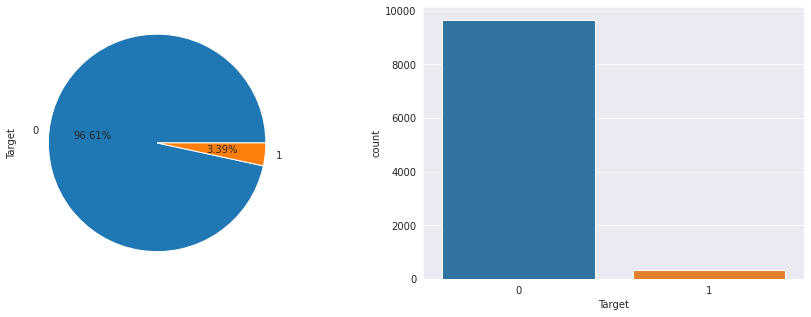

In [6]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
data['Target'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Target', data = data)
plt.show()

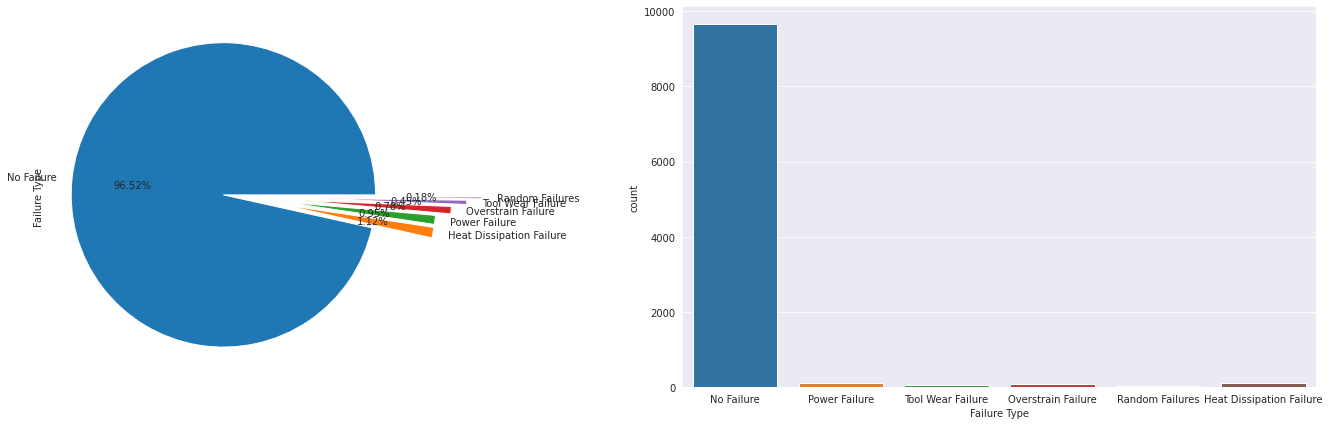

In [7]:
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
data['Failure Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = (0.1,0.3,0.3,0.4,0.5,0.6))
plt.subplot(1,2,2)
sns.countplot(x = 'Failure Type', data = data)
plt.show()

In [8]:
data = data.drop(['UDI','Product ID','Failure Type'], axis = 1)

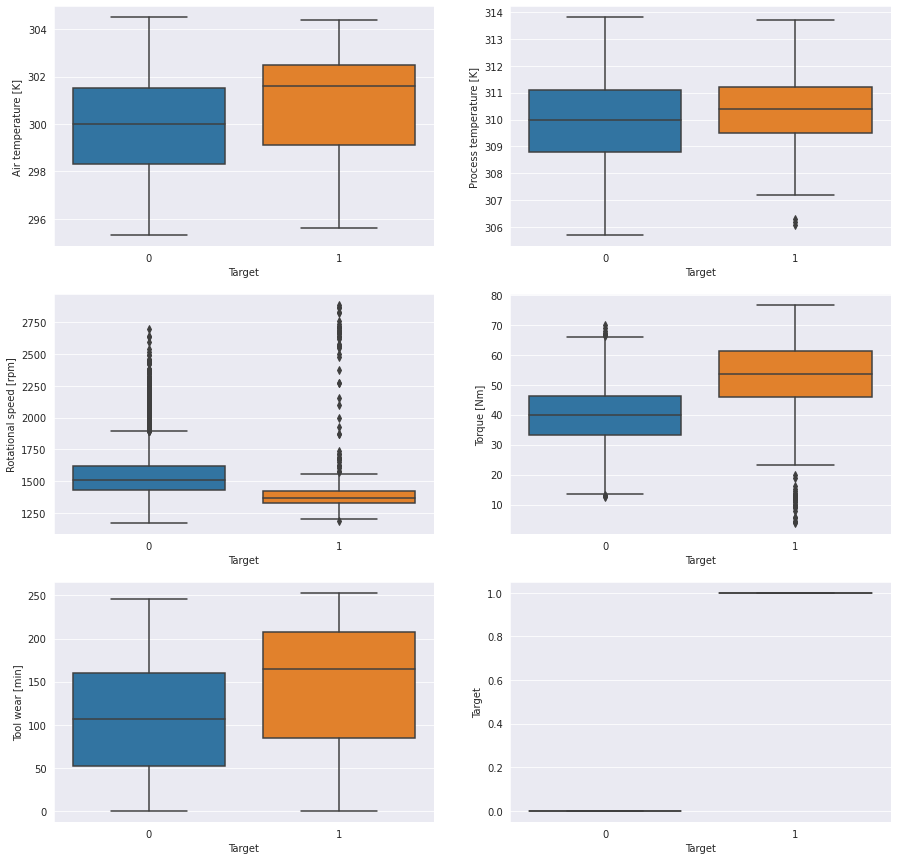

In [9]:
plt.figure(figsize = (15,15))
for i,col in enumerate(data.select_dtypes('number').columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y = col, x = 'Target' ,data = data)
plt.show()

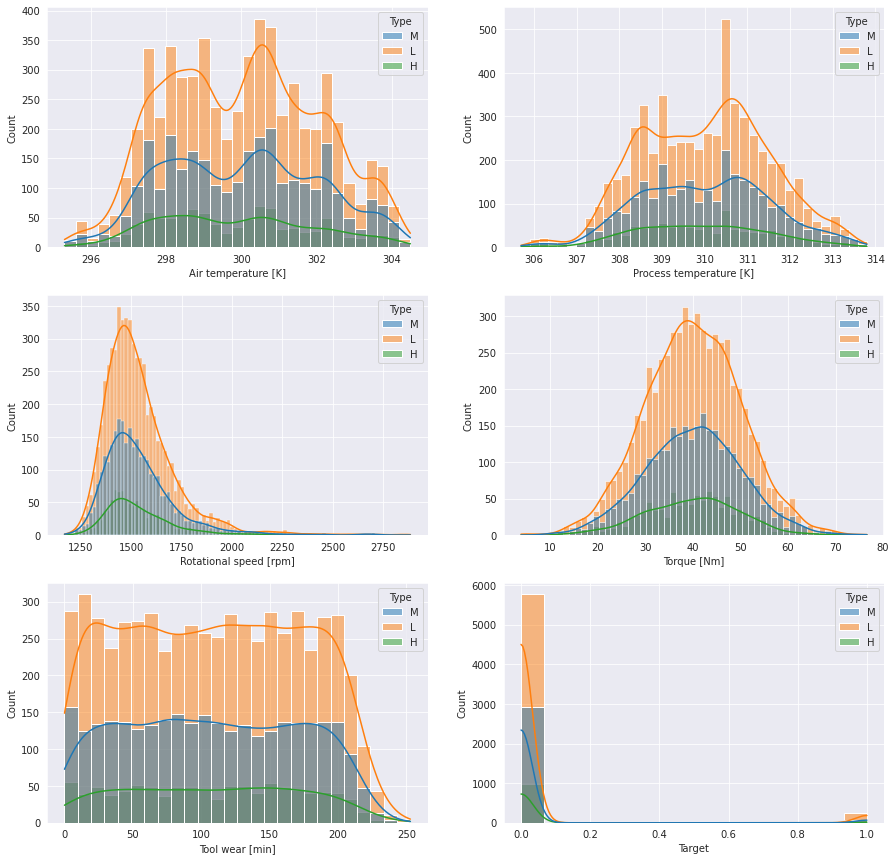

In [10]:
plt.figure(figsize = (15,15))
for i,col in enumerate(data.select_dtypes('number').columns):
    plt.subplot(3,2,i+1)
    sns.histplot(x = col, data = data, kde = True, hue = 'Type')
plt.show()

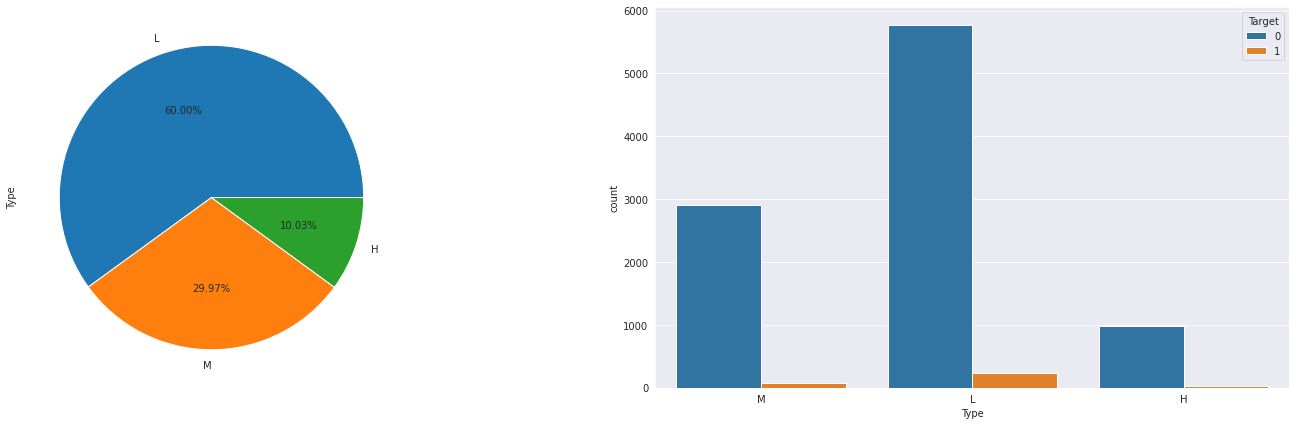

In [11]:
plt.figure(figsize = (25,7))
plt.subplot(1,2,1)
data['Type'].value_counts().plot(kind = 'pie', autopct = '%.2f%%')
plt.subplot(1,2,2)
sns.countplot(x = 'Type',hue = 'Target' ,data = data)
plt.show()

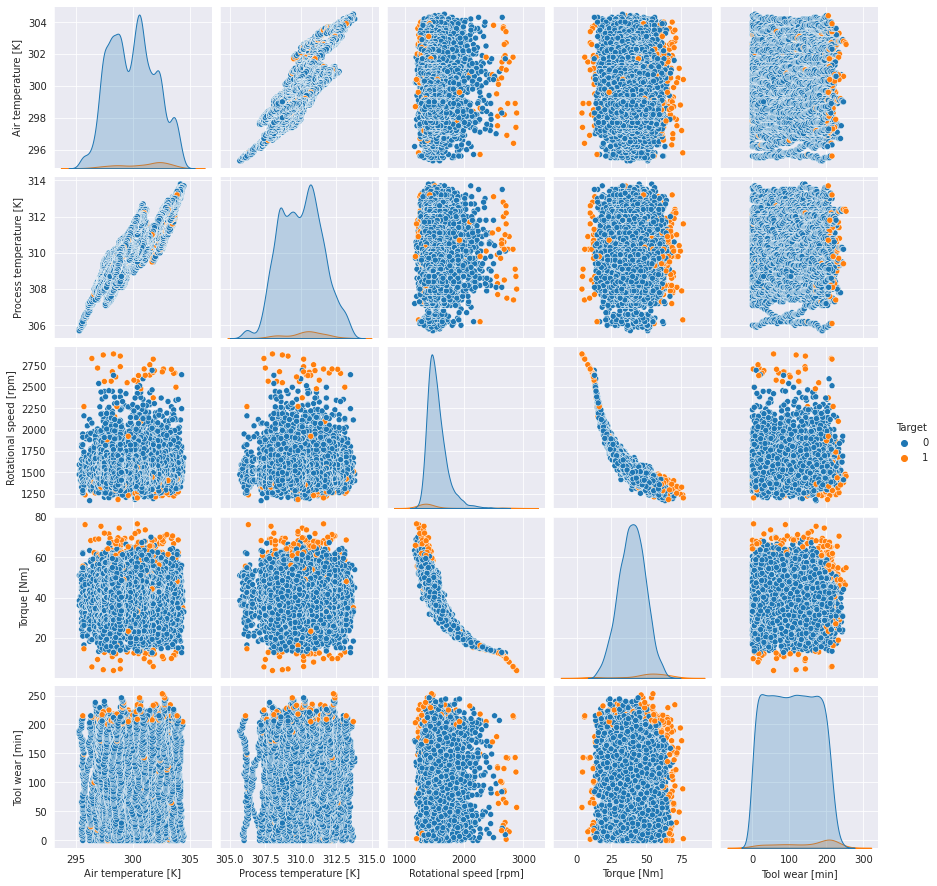

In [12]:
sns.pairplot(data, hue = 'Target')
plt.show()

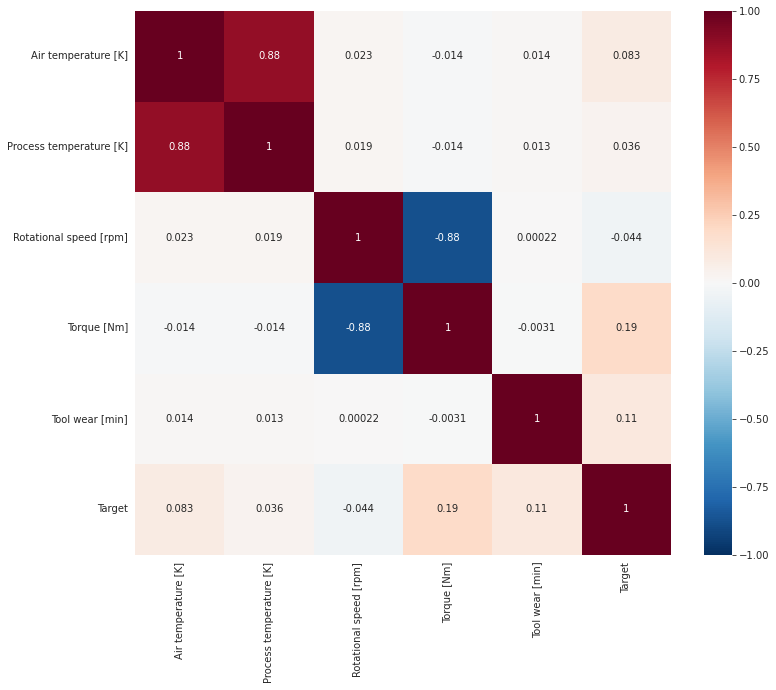

In [13]:
plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), vmin = -1.0, vmax = 1.0, center = 0, cmap = 'RdBu_r', annot = True)
plt.show()

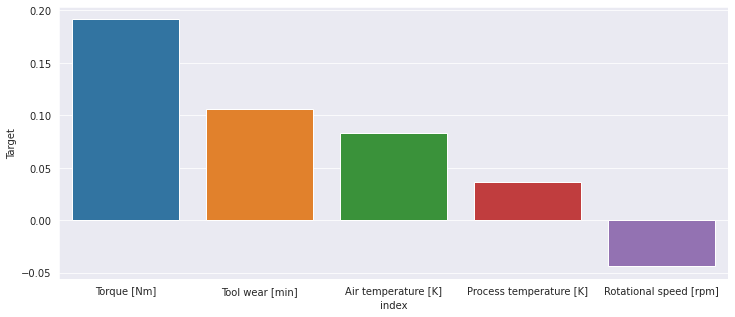

In [14]:
plt.figure(figsize = (12,5))
sns.barplot(x = 'index', y = 'Target',data = data.corr()['Target'].sort_values(ascending = False).reset_index()[1:])
plt.show()

In [15]:
data.sample(5)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
9863,L,298.9,309.8,1411,56.3,84,0
7480,M,300.2,311.4,1570,35.3,138,0
7671,M,300.5,311.6,1456,51.1,193,0
6015,M,300.8,310.8,1520,38.0,45,0
5384,M,302.9,312.4,1421,46.0,206,0


In [16]:
data['Type'] = data['Type'].map({'L':2,'M':1,'H':0})

In [17]:
X = data.drop(['Target'], axis = 1).copy()
y = data['Target'].copy()

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = pd.DataFrame(sc.transform(X_train), columns = X_train.columns, index = X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns = X_test.columns, index = X_test.index)

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_scaled, y_train = oversample.fit_resample(X_train_scaled, y_train)

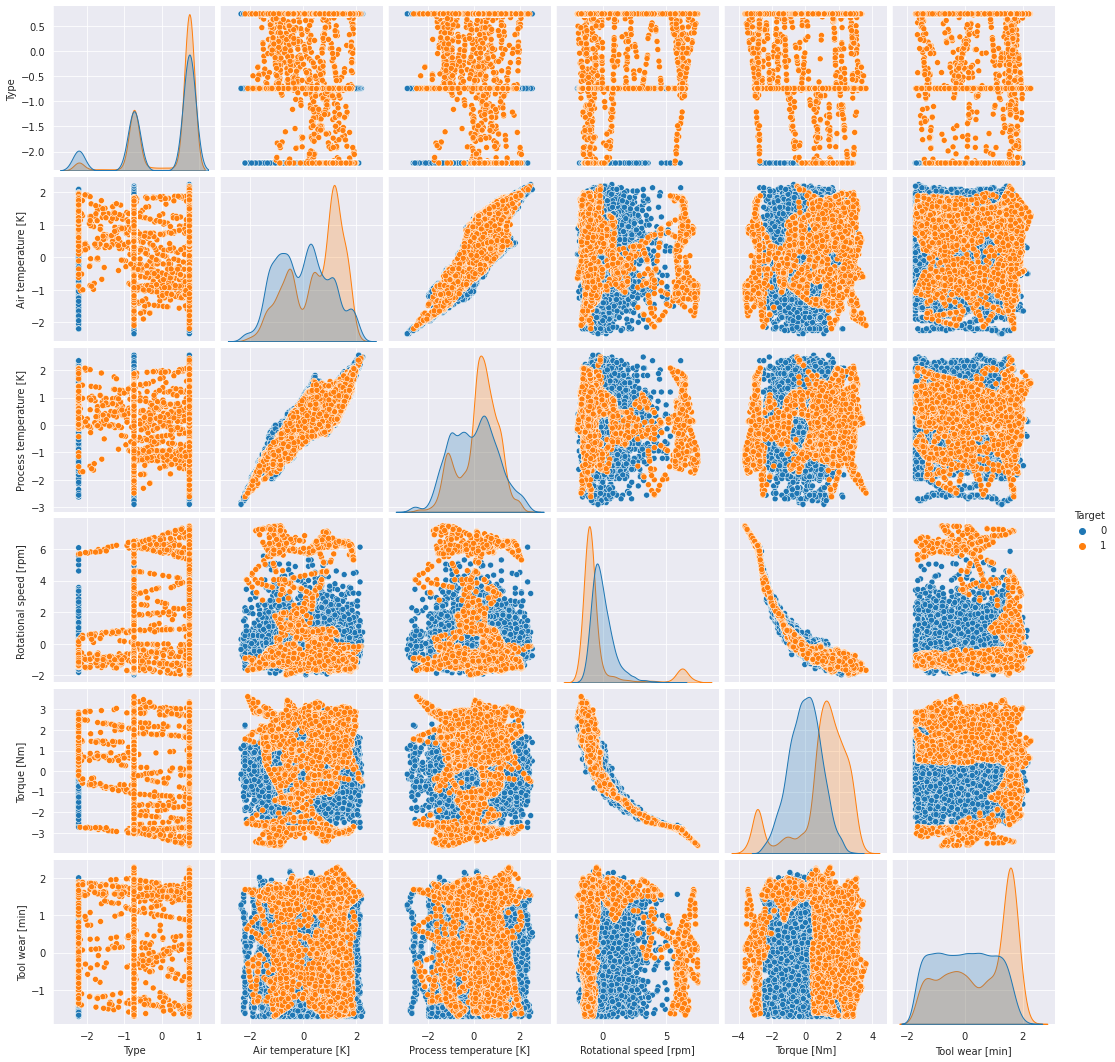

In [21]:
sns.pairplot(pd.concat([X_train_scaled,y_train], axis =1), hue = 'Target')
plt.show()

In [22]:
!pip install -q pycaret
from pycaret.classification import setup, compare_models, create_model, predict_model

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scattertext 0.1.5 requires gensim>=4.0.0, but you have gensim 3.8.3 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.0 which is incompatible.
en-core-web-sm 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 2.3.7 which is incompatible.
en-core-web-lg 3.1.0 requires spacy<3.2.0,>=3.1.0, but you have spacy 2.3.7 which is incompatible.


In [23]:
_ = setup(data = pd.concat([X_train_scaled,y_train], axis =1), target = 'Target', silent = True)

,Description,Value
0,session_id,8494
1,Target,Target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15444, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
top5 = compare_models(n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9851,0.9992,0.9921,0.9787,0.9854,0.9702,0.9703,0.4740
xgboost,Extreme Gradient Boosting,0.9850,0.9990,0.9918,0.9789,0.9853,0.9700,0.9701,20.8080
lightgbm,Light Gradient Boosting Machine,0.9827,0.9985,0.9894,0.9767,0.9830,0.9654,0.9655,0.1950
catboost,CatBoost Classifier,0.9789,0.9981,0.9890,0.9699,0.9794,0.9578,0.9580,4.7500
rf,Random Forest Classifier,0.9781,0.9984,0.9857,0.9714,0.9785,0.9561,0.9563,0.7190
dt,Decision Tree Classifier,0.9650,0.9650,0.9691,0.9622,0.9656,0.9300,0.9301,0.0290
knn,K Neighbors Classifier,0.9582,0.9855,0.9927,0.9296,0.9601,0.9163,0.9186,0.0900
gbc,Gradient Boosting Classifier,0.9488,0.9889,0.9632,0.9375,0.9501,0.8976,0.8981,0.6620
ada,Ada Boost Classifier,0.9207,0.9722,0.9257,0.9183,0.9219,0.8414,0.8416,0.2060
qda,Quadratic Discriminant Analysis,0.8488,0.9307,0.8120,0.8799,0.8444,0.6977,0.7001,0.0140


In [25]:
model = create_model(top5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9806,0.9987,0.9872,0.9747,0.9809,0.9611,0.9612
1,0.9833,0.9992,0.9872,0.9800,0.9836,0.9667,0.9667
2,0.9796,0.9995,0.9945,0.9663,0.9802,0.9593,0.9597
3,0.9889,0.9992,0.9963,0.9820,0.9891,0.9778,0.9779
4,0.9898,0.9999,0.9963,0.9838,0.9900,0.9796,0.9797
5,0.9843,0.9992,0.9945,0.9749,0.9846,0.9685,0.9687
6,0.9861,0.9985,0.9872,0.9854,0.9863,0.9722,0.9722
7,0.9907,0.9997,0.9945,0.9873,0.9909,0.9815,0.9815
8,0.9843,0.9993,0.9927,0.9766,0.9846,0.9685,0.9687
9,0.9833,0.9990,0.9908,0.9765,0.9836,0.9667,0.9668


Accuracy score : 0.9640
F1 score : 0.5556



Classification Report: 
----------------------

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1939
           1       0.45      0.74      0.56        61

    accuracy                           0.96      2000
   macro avg       0.72      0.85      0.77      2000
weighted avg       0.97      0.96      0.97      2000




Confusion Matrix: 
-----------------



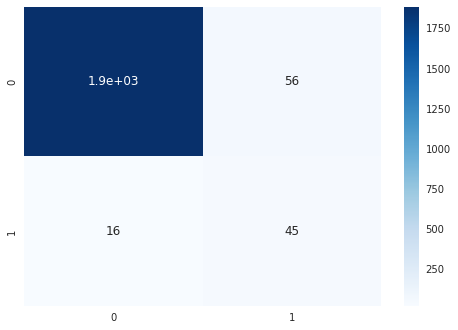

In [26]:
y_pred = predict_model(model, data = X_test_scaled)['Label']

from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

print('Accuracy score : {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score : {:.4f}'.format(f1_score(y_test,y_pred)))

print('\n\n\nClassification Report: \n----------------------\n')
clr = classification_report(y_test,y_pred)
print(clr)

print('\n\n\nConfusion Matrix: \n-----------------\n')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, cmap = 'Blues')
plt.show()

In [27]:
from pycaret.classification import stack_models
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9852,0.9992,0.9854,0.9854,0.9854,0.9704,0.9704
1,0.9917,0.9996,0.9927,0.9909,0.9918,0.9833,0.9833
2,0.9861,0.9996,0.9909,0.9819,0.9864,0.9722,0.9723
3,0.9889,0.9993,0.9945,0.9837,0.9891,0.9778,0.9779
4,0.9926,0.9998,0.9945,0.9909,0.9927,0.9852,0.9852
5,0.9870,0.9994,0.9890,0.9854,0.9872,0.9741,0.9741
6,0.9806,0.9989,0.9799,0.9817,0.9808,0.9611,0.9611
7,0.9898,0.9987,0.9872,0.9926,0.9899,0.9796,0.9797
8,0.9861,0.9991,0.9780,0.9944,0.9861,0.9722,0.9724
9,0.9870,0.9991,0.9853,0.9890,0.9872,0.9741,0.9741


Accuracy score : 0.9765
F1 score : 0.6569



Classification Report: 
----------------------

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1939
           1       0.59      0.74      0.66        61

    accuracy                           0.98      2000
   macro avg       0.79      0.86      0.82      2000
weighted avg       0.98      0.98      0.98      2000




Confusion Matrix: 
-----------------



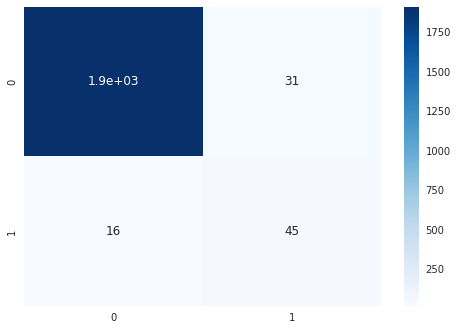

In [28]:
y_pred = predict_model(stacker, data = X_test_scaled)['Label']

from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report

print('Accuracy score : {:.4f}'.format(accuracy_score(y_test,y_pred)))
print('F1 score : {:.4f}'.format(f1_score(y_test,y_pred)))

print('\n\n\nClassification Report: \n----------------------\n')
clr = classification_report(y_test,y_pred)
print(clr)

print('\n\n\nConfusion Matrix: \n-----------------\n')
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True, cmap = 'Blues')
plt.show()